In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
dataset = pd.read_csv('GOOG (2).csv',index_col="Date",parse_dates=True)

In [3]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-11-27,748.460022,753.409973,747.489990,750.260010,838500
2015-11-30,748.809998,754.929993,741.270020,742.599976,2097600
2015-01-12,747.109985,768.950012,746.700012,767.039978,2134600
2015-02-12,768.900024,775.955017,758.960022,762.380005,2230400
2015-03-12,766.010010,768.994995,745.630005,752.539978,2590600


In [4]:
dataset.isna().any() 
#function detect missing values in the given series object. 
#It return a boolean same-sized object indicating if the values are NA. 
#Missing values gets mapped to True and non-missing value gets mapped to False. 

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1030 entries, 2015-11-27 to 2019-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1030 non-null   float64
 1   High    1030 non-null   float64
 2   Low     1030 non-null   float64
 3   Close   1030 non-null   float64
 4   Volume  1030 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 48.3 KB


<AxesSubplot:xlabel='Date'>

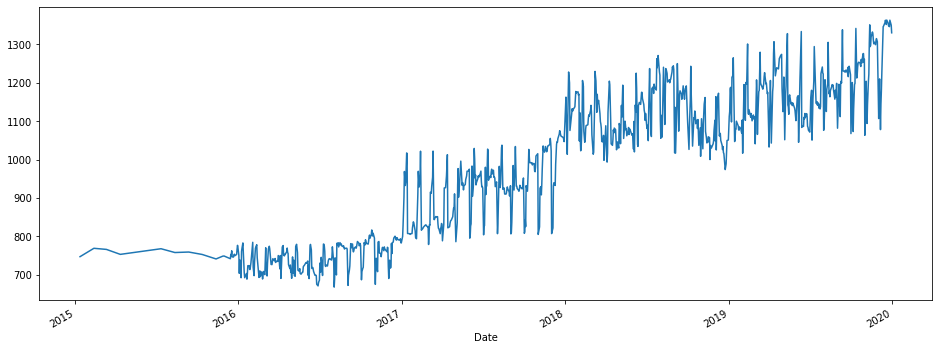

In [6]:
dataset['Open'].plot(figsize=(16,6))

In [7]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2015-11-27,NaN,NaN,NaN,NaN,NaN
2015-11-30,NaN,NaN,NaN,NaN,NaN
2015-01-12,NaN,NaN,NaN,NaN,NaN
2015-02-12,NaN,NaN,NaN,NaN,NaN
2015-03-12,NaN,NaN,NaN,NaN,NaN
2015-04-12,NaN,NaN,NaN,NaN,NaN
2015-07-12,757.165719,765.637137,749.305725,757.839992,2.065900e+06
2015-08-12,758.512861,767.264282,750.264300,759.569990,2.207471e+06
2015-09-12,759.992859,768.592852,749.654436,760.857134,2.293529e+06


<AxesSubplot:xlabel='Date'>

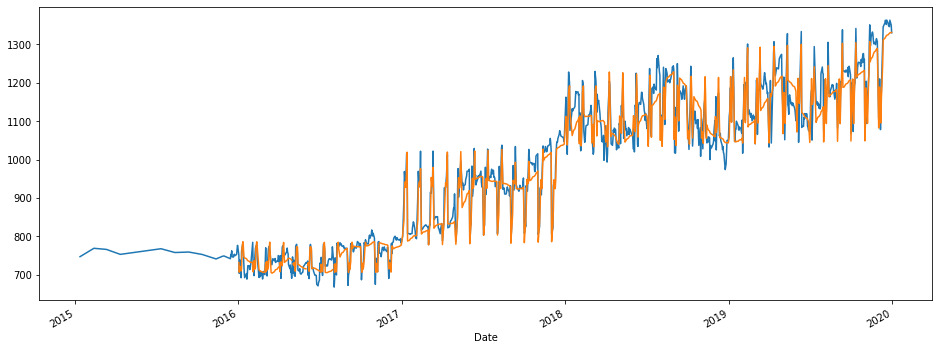

In [8]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

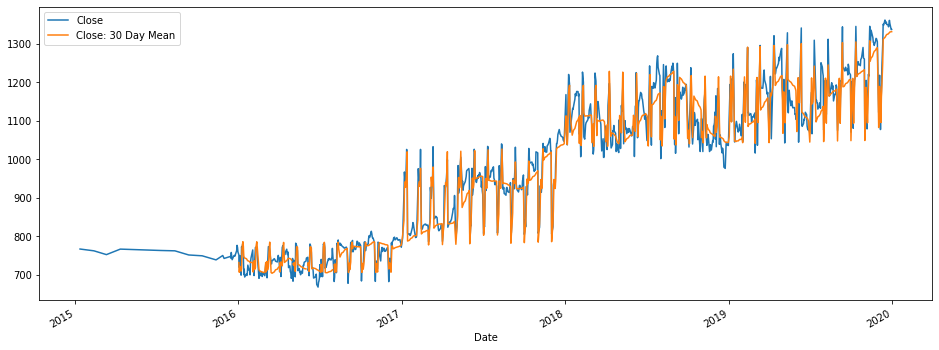

In [9]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

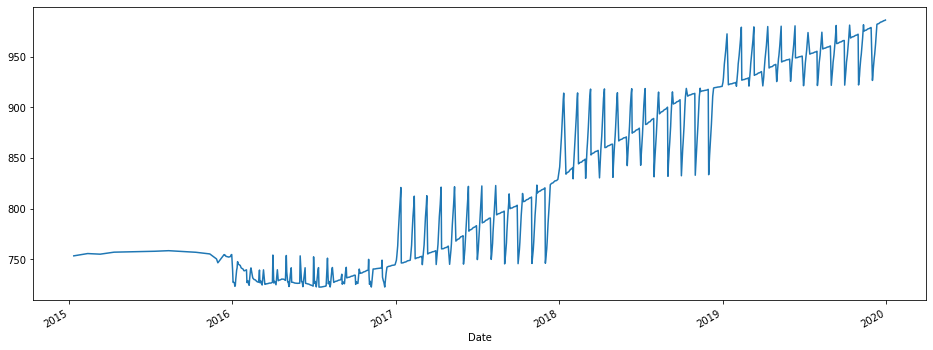

In [10]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [11]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [24]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [25]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1030):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [26]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [27]:
# Initialising the RNN
regressor = Sequential()

In [28]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [30]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
31/31 [==============================] - 2s 63ms/step - loss: 0.0019
Epoch 2/100
31/31 [==============================] - 2s 64ms/step - loss: 0.0018
Epoch 3/100
31/31 [==============================] - 2s 65ms/step - loss: 0.0021
Epoch 4/100
31/31 [==============================] - 3s 90ms/step - loss: 0.0022
Epoch 5/100
31/31 [==============================] - 2s 69ms/step - loss: 0.0016
Epoch 6/100
31/31 [==============================] - 2s 66ms/step - loss: 0.0018
Epoch 7/100
31/31 [==============================] - 2s 65ms/step - loss: 0.0018
Epoch 8/100
31/31 [==============================] - 2s 67ms/step - loss: 0.0019
Epoch 9/100
31/31 [==============================] - 2s 66ms/step - loss: 0.0020
Epoch 10/100
31/31 [==============================] - 2s 68ms/step - loss: 0.0020
Epoch 11/100
31/31 [==============================] - 2s 71ms/step - loss: 0.0018
Epoch 12/100
31/31 [==============================] - 2s 70ms/step - loss: 0.0017
Epoch 13/100
31/31 [=====

In [31]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2020
dataset_test = pd.read_csv('GOOG (2) test.csv',index_col="Date",parse_dates=True)


In [32]:
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_test.head()
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)
test_set.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 229 entries, 2020-02-01 to 2020-11-25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    229 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


In [33]:
# Getting the predicted stock price of 2020
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 289):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [34]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       229 non-null    float32
dtypes: float32(1)
memory usage: 1.0 KB


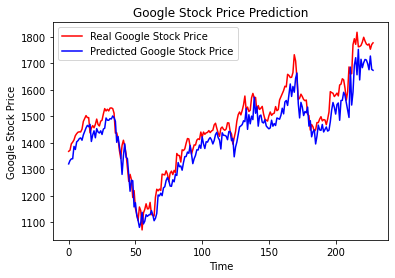

In [37]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
